# Iris Dataset 

Iris flower is divided into 3 species:
- I.setosa
- I.versicolor
- I.virginica

The iris dataset consists of 4 features:
- Sepal Length
- Sepal Width
- Petal Length
- Petal Width

The objective of this project is to predict the species given the four features of an iris flower.

### Load the data
The sklearn library has the iris dataset in the sklearn.datasets module. The dataset is loaded through sklearn library.

In [1]:
from sklearn.datasets import load_iris
iris=load_iris()

### Visualising the data

A scatter plot between the sepal length and the sepal width is plotted to visualise the iris dataset.


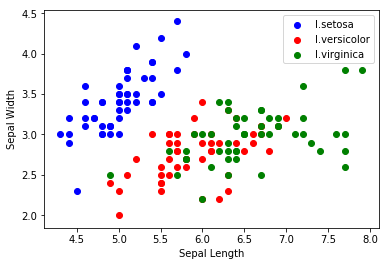

In [2]:
#splitting the features and the labels
features=iris.data
labels=iris.target

import matplotlib.pyplot as plt
labels_names = ['I.setosa', 'I.versicolor', 'I.virginica']

colors=['blue', 'red', 'green']
for i in range(len(colors)):
    px=features[:,0][labels==i]
    py=features[:,1][labels==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(labels_names)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

We see that the seapration between the blue dots(I.setosa) and red(I.versicolor) and green dots(I.virginica) is quite clear, while separating red dots from green dots seems a very difficult task given the two features available.

We visualise the data on different features- petal width and petal length.

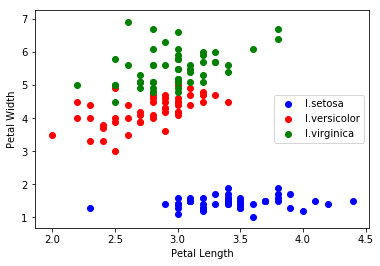

In [3]:
for i in range(len(colors)):
    px=features[:,1][labels==i]
    py=features[:,2][labels==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(labels_names)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

In this case, the decision boundary between the green and the red dots can be easily determined.

Therefore, using all the features for training is a good choice.

### PCA: visualising the principle components

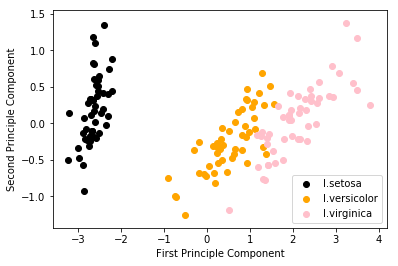

In [4]:
from sklearn.decomposition import PCA
est=PCA(n_components=2)
x_pca=est.fit_transform(features)

colors=['black', 'orange', 'pink']
for i in range(len(colors)):
    px=x_pca[:,0][labels==i]
    py=x_pca[:,1][labels==i]
    plt.scatter(px, py, c=colors[i])
plt.legend(labels_names)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()

As can be seen from this plot, 2 principle components are sufficient to distinguish between the three classes. Hence, we use the data obtained frm the PCA transformation as training and testing data.


### Train the data

First, we split the testing and training data.

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x_pca, labels, test_size=0.4, random_state=33)

Next, we choose a classifier to train our data. In this case we use Support Vector Machine.

In [6]:
from sklearn.svm import SVC
clf=SVC()
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Predict the results

In [7]:
pred = clf.predict(x_test)

### Evaluate the results

In [8]:
from sklearn import metrics
print(metrics.classification_report(
    y_test, pred, target_names=labels_names))

              precision    recall  f1-score   support

    I.setosa       1.00      1.00      1.00        17
I.versicolor       0.91      1.00      0.95        20
 I.virginica       1.00      0.91      0.95        23

 avg / total       0.97      0.97      0.97        60



We have computed precision, recall, and f1-score for each class and their average values. What we can see in this table is:

- The classifier obtained 1.0 precision and recall in the setosa and virginica class. This means that for precision, 100 percent of the instances that are classified as setosa and virginica are really setosa and virginica instances respectively. 
- Recall value equals 1.0 for setosa and versicolor class. This means that 100 percent of the setosa and versicolor instances were classified as setosa and versicolor respectively.

The method used is very good at predicting all the three classes. The support value shows how many instances of each class we had in the testing set.